In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
#from mlxtend.classifier import StackingCVClassifier

In [6]:
data = pd.read_csv('/content/drive/MyDrive/framingham.csv')

In [7]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
data["glucose"].fillna((data["glucose"].mode())[0], inplace=True)

In [9]:
data.dropna(inplace=True)
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
data = data[data['totChol']<600.0]
data = data[data['sysBP']<295.0]
data.shape

(3987, 16)

In [11]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000
mean,0.433409,49.469526,1.982694,0.491347,9.027840,0.029345,0.005518,0.309255,0.025082,236.502132,132.177452,82.849887,25.769488,75.869325,81.272385,0.148733
std,0.495608,8.531325,1.020832,0.499988,11.918332,0.168794,0.074087,0.462244,0.156392,43.653337,21.793408,11.854644,4.075145,12.086398,22.954842,0.355870
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


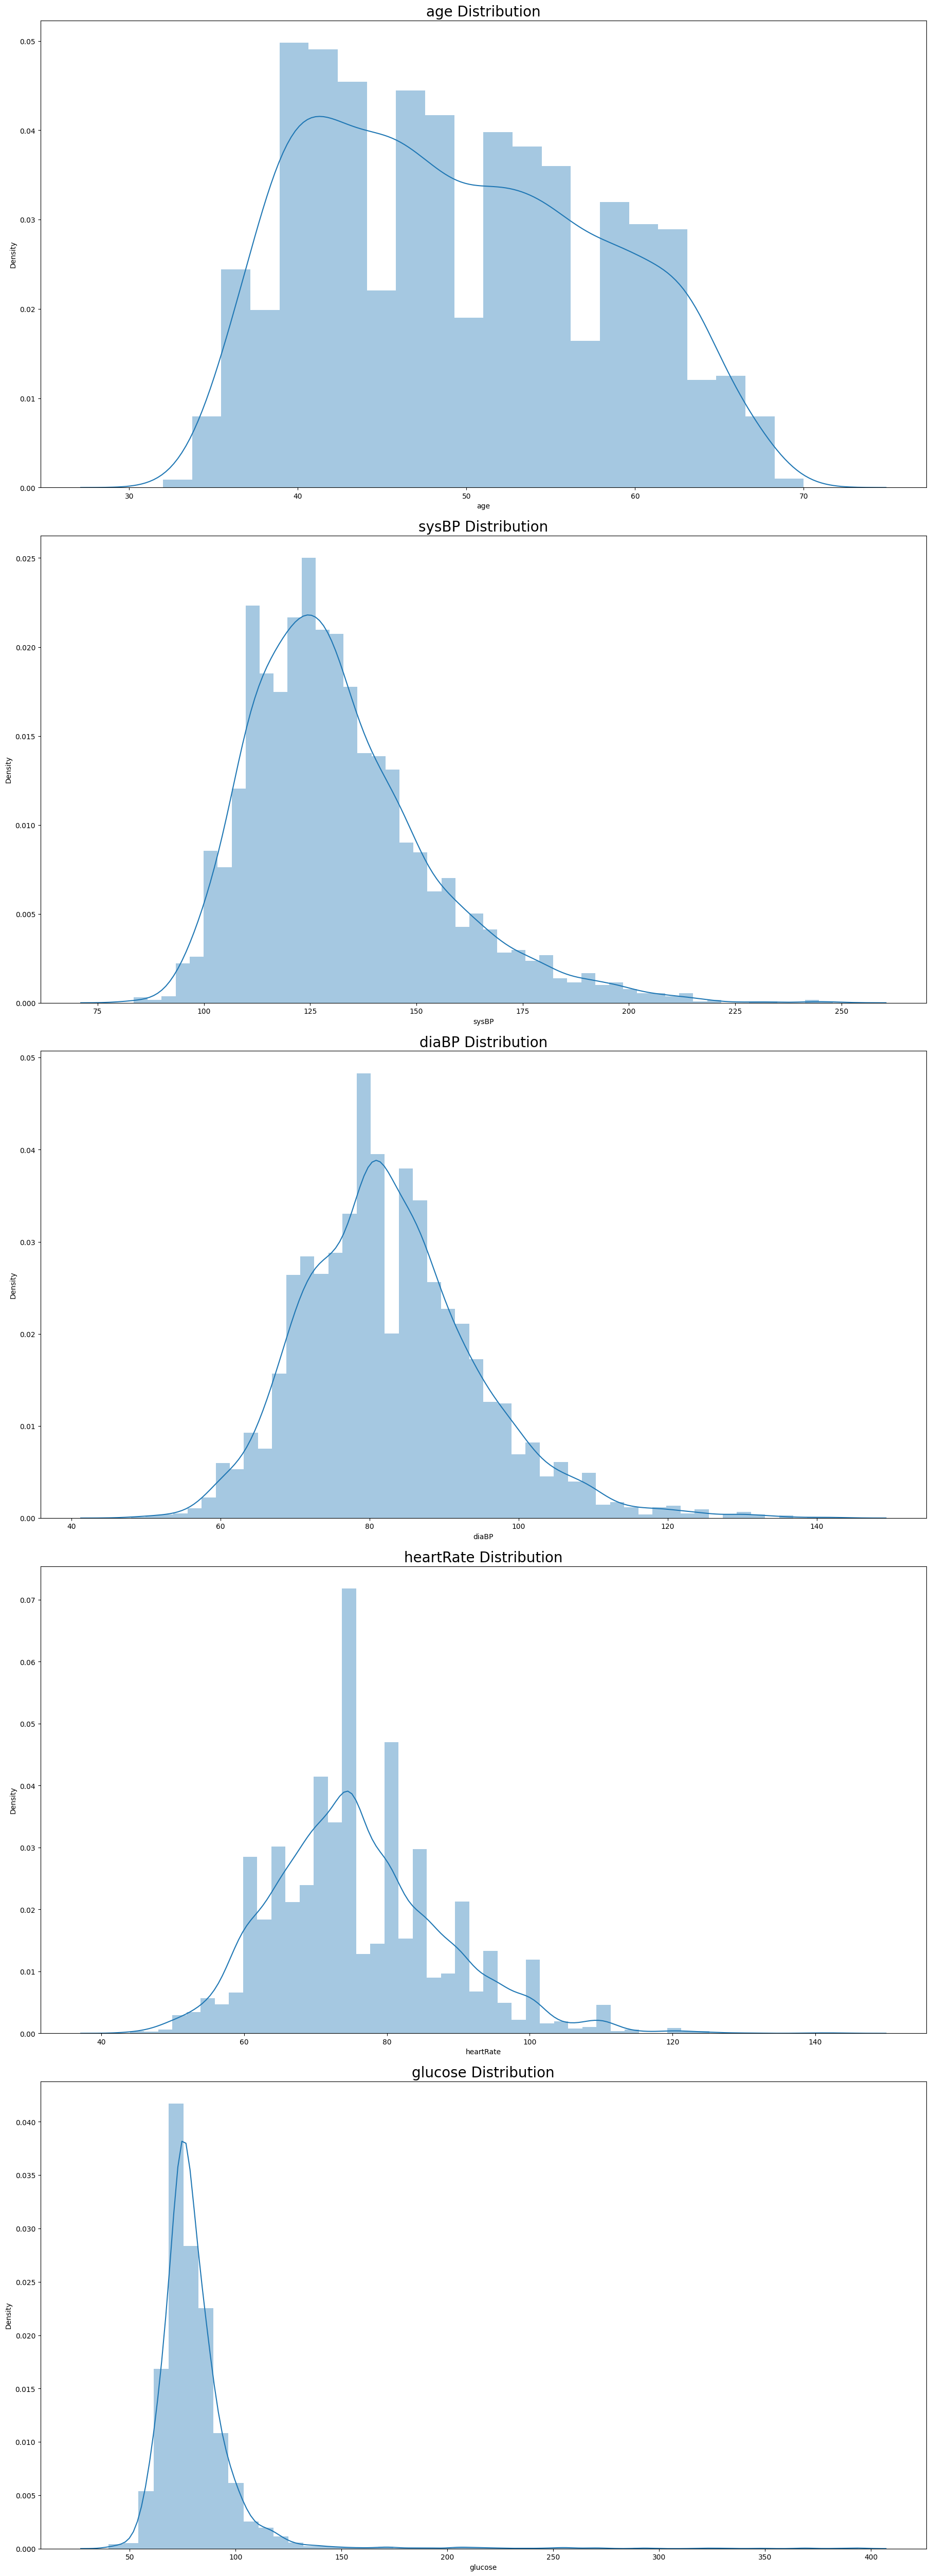

In [12]:
import warnings
warnings.filterwarnings('ignore')

numeric_features = ['age','sysBP', 'diaBP', 'heartRate', 'glucose']

fig, axs = plt.subplots(nrows=len(numeric_features), figsize=(18, 10*len(numeric_features)), facecolor='w', constrained_layout=True)

for i, feature in enumerate(numeric_features):
    sns.distplot(data[feature], ax=axs[i])
    axs[i].set_title('{} Distribution'.format(feature), fontsize=20)
    
plt.show()

In [14]:
data=data[['sysBP','glucose','age','diaBP','heartRate','TenYearCHD']]
data.head()


,sysBP,glucose,age,diaBP,heartRate,TenYearCHD
0,106.0,77.0,39,70.0,80.0,0
1,121.0,76.0,46,81.0,95.0,0
2,127.5,70.0,48,80.0,75.0,0
3,150.0,103.0,61,95.0,65.0,1
4,130.0,85.0,46,84.0,85.0,0


In [15]:
# Create new features
data['sysBP_diaBP'] = data['sysBP'] * data['diaBP']
data['sysBP_glucose'] = data['sysBP'] * data['glucose']
data['age_sysBP'] = data['age'] * data['sysBP']

In [16]:
target1=data[data['TenYearCHD']==1]
target0=data[data['TenYearCHD']==0]
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)
target=pd.concat([target0,target1])
target['TenYearCHD'].value_counts()
data=target
np.shape(data)


(6788, 9)

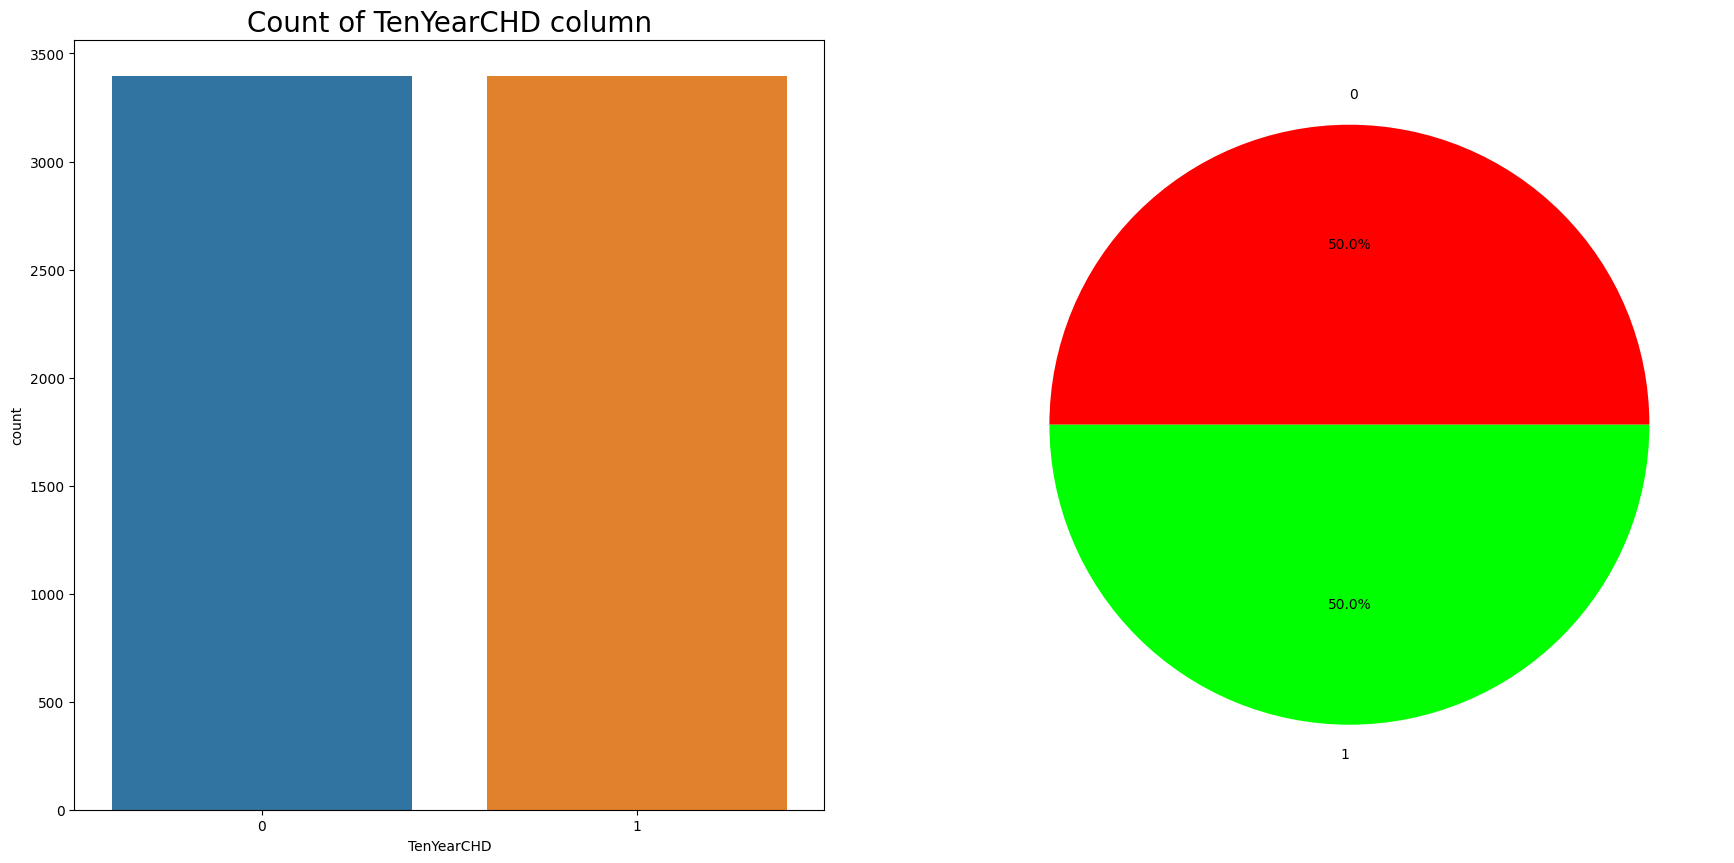

In [17]:
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=target)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(target["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

In [20]:
# Calculate correlations
corr_matrix = data.corr()

In [21]:
# Extract correlation values for each feature
chd_corr = corr_matrix['TenYearCHD']

In [22]:
sysBP_diaBP_corr = corr_matrix['sysBP_diaBP']
sysBP_glucose_corr = corr_matrix['sysBP_glucose']
age_sysBP_corr = corr_matrix['age_sysBP']

In [23]:
print('Correlation with CHD:')
print('sysBP*diaBP:', sysBP_diaBP_corr['TenYearCHD'])
print('sysBP*glucose:', sysBP_glucose_corr['TenYearCHD'])
print('age*sysBP:', age_sysBP_corr['TenYearCHD'])

Correlation with CHD:
sysBP*diaBP: 0.24240345431081037
sysBP*glucose: 0.1989438185650284
age*sysBP: 0.3434919699476977


Text(0.5, 1.0, 'Correlation among all the Variables of the Dataset including Feature Engineering')

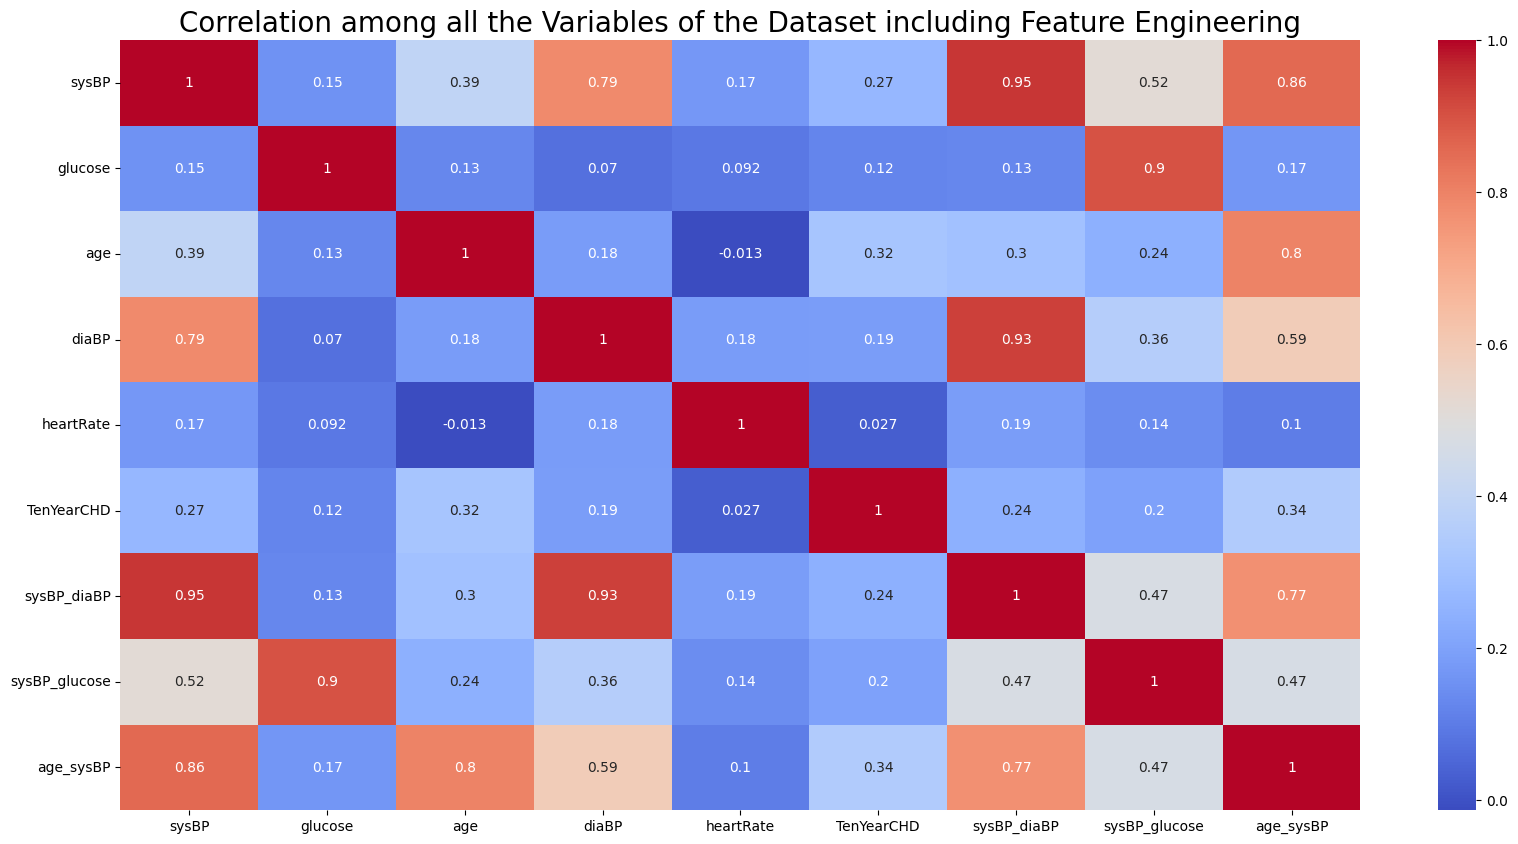

In [24]:
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True, cmap='coolwarm')
plt.title("Correlation among all the Variables of the Dataset including Feature Engineering", size=20)

Feature Splitting and Scaling

In [32]:
# Split data into training and testing sets
X = data[['sysBP_diaBP', 'sysBP_glucose', 'age_sysBP']]
y = data['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [62]:
# Define CNN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((3, 1), input_shape=(3,)),
    tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [70]:
#Compile model
#cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [63]:
# Define Deep Belief Network (DBN) architecture
dbn_model = Sequential()
dbn_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
dbn_model.add(Dropout(0.5))
dbn_model.add(Dense(64, activation='relu'))
dbn_model.add(Dropout(0.5))
dbn_model.add(Dense(1, activation='sigmoid'))
dbn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [64]:
# Define Recurrent Neural Network (RNN) architecture
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(10, 1)))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [65]:
# Define Long Short-Term Memory (LSTM) architecture
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(10, 1)))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [67]:
# Reshape the data for RNN and LSTM models
X_train_reshaped1 = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped1 = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


In [72]:
# Train the CNN and DBN models
history_cnn = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=10, batch_size=32, verbose=1)
history_dbn = dbn_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=32, verbose=1)


Epoch 1/10
149/149 [==============================] - 1s 4ms/step - loss: 0.6261 - accuracy: 0.6571 - val_loss: 0.6160 - val_accuracy: 0.6510
Epoch 2/10
149/149 [==============================] - 0s 3ms/step - loss: 0.6236 - accuracy: 0.6561 - val_loss: 0.6188 - val_accuracy: 0.6554
Epoch 3/10
149/149 [==============================] - 0s 3ms/step - loss: 0.6250 - accuracy: 0.6571 - val_loss: 0.6159 - val_accuracy: 0.6475
Epoch 4/10
149/149 [==============================] - 0s 3ms/step - loss: 0.6236 - accuracy: 0.6569 - val_loss: 0.6167 - val_accuracy: 0.6480
Epoch 5/10
149/149 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.6573 - val_loss: 0.6236 - val_accuracy: 0.6436
Epoch 6/10
149/149 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 0.6548 - val_loss: 0.6142 - val_accuracy: 0.6578
Epoch 7/10
149/149 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.6546 - val_loss: 0.6236 - val_accuracy: 0.6446
Epoch 

the validation accuracy for the CNN and DBN models is not very high, indicating that there may be some room for improvement in the models. It may be worth trying to tune the hyperparameters, such as the number of filters, kernel size, and pool size for the CNN model, and the number of neurons and dropout rate for the DBN model, to see if the performance can be improved.

In [78]:
# Evaluate the models on the test set
score_cnn = model.evaluate(X_test_reshaped, y_test, verbose=0)
score_dbn = dbn_model.evaluate(X_test_scaled, y_test, verbose=0)




In [79]:

# Print the test accuracy for CNN and DBN model
print('CNN Test Accuracy:', score_cnn[1])
print('DBN Test Accuracy:', score_dbn[1])


CNN Test Accuracy: 0.6499754786491394
DBN Test Accuracy: 0.6588119864463806


Based on the training and validation accuracies, it seems like the DBN model has performed slightly better than the CNN model. However, to get a better idea of the models' performance, it's important to evaluate them on the test set.

The test accuracies for the CNN and DBN models are 0.6499754786491394 and 0.6588119864463806, respectively. It appears that the DBN model has performed slightly better on the test set as well. However, it's important to keep in mind that these results may vary depending on the specific dataset and problem you are working on.

to compare the performance of the models using a bar plot

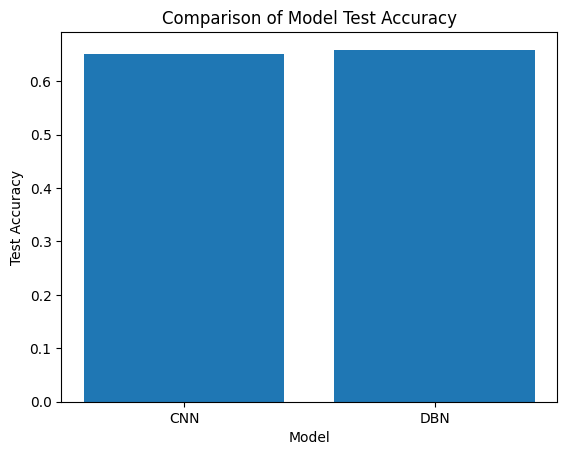

In [80]:
import matplotlib.pyplot as plt

# Define the test accuracy scores for each model
test_acc = [score_cnn[1], score_dbn[1]]

# Define the names of each model
model_names = ['CNN', 'DBN']

# Create the bar plot
plt.bar(model_names, test_acc)

# Add labels and title to the plot
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Test Accuracy')

# Show the plot
plt.show()


In [ ]:
# Train the RNN and LSTM  models
history_rnn = rnn_model.fit(X_train_reshaped1, y_train, validation_data=(X_test_reshaped1, y_test), epochs=10, batch_size=32, verbose=1)
history_lstm = lstm_model.fit(X_train_reshaped1, y_train, validation_data=(X_test_reshaped1, y_test), epochs=10, batch_size=32, verbose=1)

In [ ]:
# Evaluate the models on the test set for RNN and LSTM
score_rnn = rnn_model.evaluate(X_test_reshaped1, y_test, verbose=0)
score_lstm = lstm_model.evaluate(X_test_reshaped2, y_test, verbose=0)

In [ ]:
# Print the test accuracy for RNN and LSTM model
print('RNN Test Accuracy:', score_rnn[1])
print('LSTM Test Accuracy:', score_lstm[1])

to compare the performance of RNN and LSTM

In [ ]:
import matplotlib.pyplot as plt

# Define the test accuracy scores for each model
test_acc = [score_rnn[1], score_lstm[1]]

# Define the names of each model
model_names = ['RNN', 'LSTM']

# Create the bar plot
plt.bar(model_names, test_acc)

# Add labels and title to the plot
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Test Accuracy')

# Show the plot
plt.show()